## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo2mesh.misc import viewer
from tomo2mesh import DataFile
from skimage.filters import threshold_otsu
from tomo2mesh import Voids
from tomo2mesh.misc.voxel_processing import edge_map

In [2]:
Vx = DataFile('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/full_rec/2k_rec/', tiff = True).read_full()
# Vp = DataFile('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/full_rec/2k_seg/', tiff = True).read_full()


##################################################
Found existing tiff folder: 
Dataset shape: (2048, 2048, 2048)


In [3]:
voids = Voids().import_from_disk('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/voids_data/c2f_2k_b_2_subset')

	TIME: importing voids data from disk 10.46 secs


In [4]:
from copy import deepcopy
voids_sph = deepcopy(voids)
void_id = np.argmax(voids_sph["sizes"])
voids_sph.select_around_void(void_id, 800.0, pixel_size_um=2.34)

	STAT: number of voids selected - 6574


In [5]:
# make mask  
voidid = np.argmax(voids["sizes"])
cents = voids["cents"][voidid]
cents[0] = 600

In [6]:
grid, r_fac = voids.export_grid(32)

	STAT: 1/r value: 2.24


In [7]:
def draw_box(pad, n):
    a = np.zeros((32,32,32), dtype = np.uint8)
    a[0,...] = 1
    a[-1,...] = 1
    a[:,0,:] = 1
    a[:,-1,:] = 1
    a[:,:,0] = 1
    a[:,:,-1] = 1
    return np.asarray([a]*n)
# draw_box(0,len(grid))

In [8]:
Vm = np.zeros(grid.vol_shape, dtype = np.uint8)
grid.fill_patches_in_volume(np.ones((len(grid),32,32,32), dtype = np.uint8), Vm)

In [9]:
Vp = np.zeros(grid.vol_shape, dtype = np.uint8)
for iv, s_void in enumerate(voids["s_voids"]):
    Vp[s_void] += voids["x_voids"][iv]
Vp = (Vp>0).astype(np.uint8)

In [10]:
grid_sph, _ = voids_sph.export_grid(32)
Vs = np.zeros(grid_sph.vol_shape, dtype = np.uint8)
grid_sph.fill_patches_in_volume(np.ones((len(grid_sph),32,32,32), dtype = np.uint8), Vs)

	STAT: 1/r value: 61.67


In [11]:
imx = viewer.get_orthoplanes(vol = Vx, idxs = cents)
imp = viewer.get_orthoplanes(vol = Vp, idxs = cents)
imm = viewer.get_orthoplanes(vol = Vm, idxs = cents)
ims = viewer.get_orthoplanes(vol = Vs, idxs = cents)

In [12]:
pixel_res = 1.17 # micrometer per pixel
def transform_ax2(img):
    img = np.fliplr(img)
    img = np.rot90(img)
    return img
shading = 'copper'

## Just the volume  

(-0.5, 2047.5, 2047.5, -0.5)

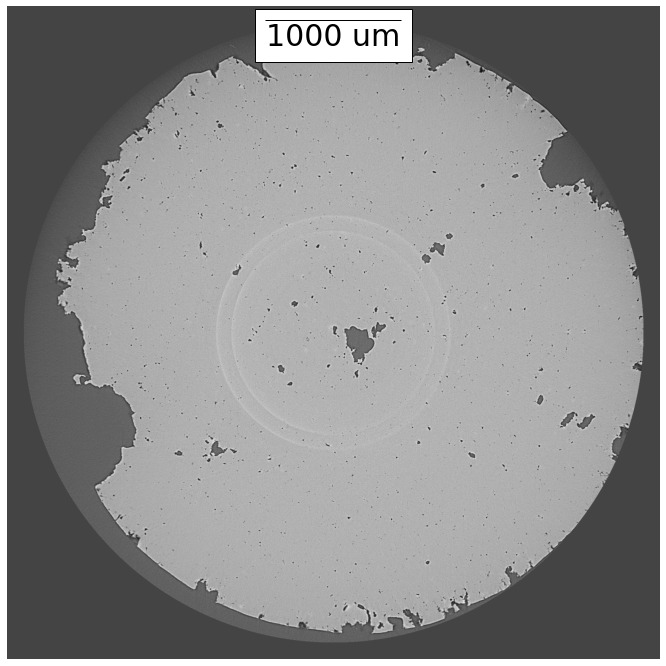

In [25]:
scrop = (slice(800,1200), slice(1000,1300))
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.imshow(imx[0], cmap = 'gray')
viewer.add_scalebar(ax, 1000, 2.34, loc = 'upper center', fontsize = 30)
ax.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

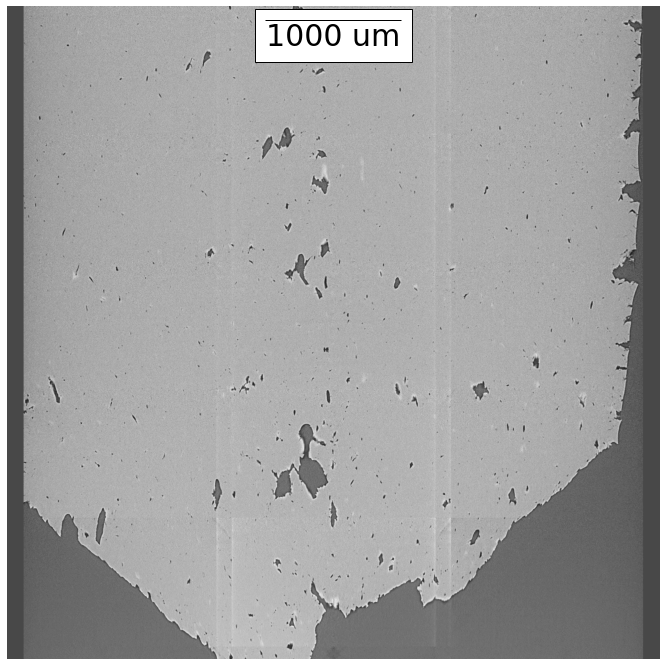

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.imshow(np.rot90(imx[1],2), cmap = 'gray')
viewer.add_scalebar(ax, 1000, 2.34, loc = 'upper center', fontsize = 30)
ax.axis('off')

## FOR MANUSCRIPT   

(-0.5, 2047.5, 2047.5, -0.5)

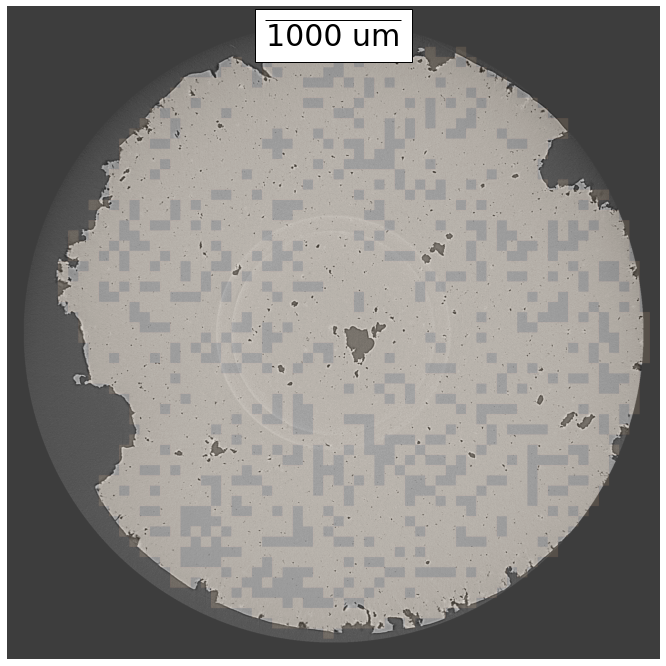

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
# viewer.edge_plot(imx[0], ims[0], ax, color =[0,0,255])
ax.imshow(imx[0], cmap = 'gray')
ax.imshow(imm[0], cmap = shading, alpha = 0.1)
viewer.add_scalebar(ax, 1000, 2.34, loc = 'upper center', fontsize = 30)
ax.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

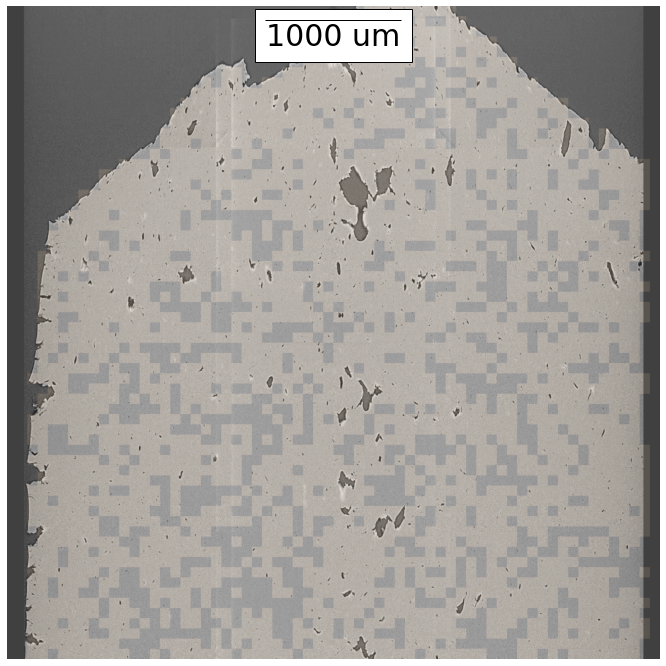

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.imshow(imx[1], cmap = 'gray')
ax.imshow(imm[1], cmap = shading, alpha = 0.1)
viewer.add_scalebar(ax, 1000, 2.34, loc = 'upper center', fontsize = 30)
ax.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

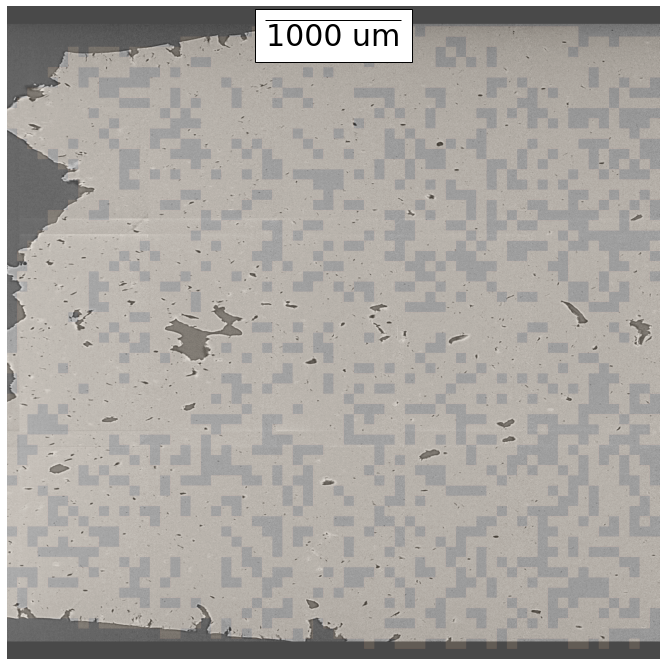

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.imshow(transform_ax2(imx[2]), cmap = 'gray')
ax.imshow(transform_ax2(imm[2]), cmap = shading, alpha = 0.1)
viewer.add_scalebar(ax, 1000, 2.34, loc = 'upper center', fontsize = 30)
ax.axis('off')

In [16]:
# ! python -c "import pandas as pd; df = pd.read_csv('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/time_logs/smartvis_times_4k.csv');print(df.groupby('criteria').min())"